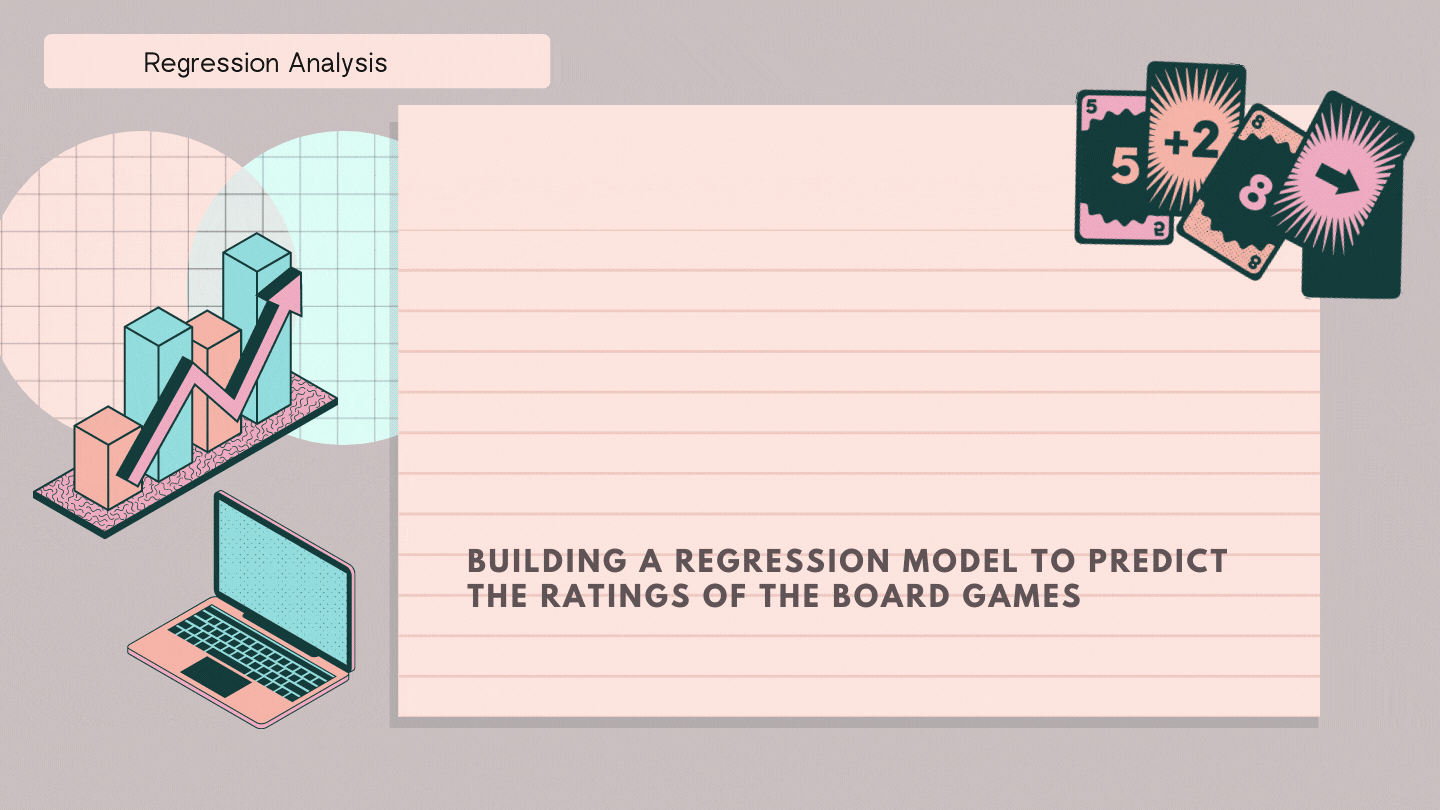

In [1]:
import PIL
from PIL import Image
a=Image.open('D:/libraries/Board Games/start.gif').convert('RGBA')
from pathlib import Path
Path('D:/libraries/Board Games').mkdir(parents=True,exist_ok=True)
a

## Table of contents


1. IMPORTING LIBRARIES
2. LOADING DATA
3. DATA CLEANING
4. DATA EXPLORATION
5. DATA PREPROCESSING
6. MODEL SELECTION
7. EVALUATING MODELS
8. CONCLUSION


# Importing libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
    
np.random.seed(42)


Bad key text.latex.preview in file C:\Users\211BN\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\211BN\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\211BN\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

## Importing Dataset

In [3]:
data =pd.read_csv('D:/libraries/Board Games/Board games.csv',sep=";")
print('Number of datapoints:',len(data))
data.head(3)

Number of datapoints: 20343


,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,"8,79",1,"3,86",68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,"8,61",2,"2,84",65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,"8,66",3,"3,91",28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games


In [4]:
data.columns

Index(['ID', 'Name', 'Year Published', 'Min Players', 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'BGG Rank',
       'Complexity Average', 'Owned Users', 'Mechanics', 'Domains'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  object 
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  object 
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 1.8+ MB


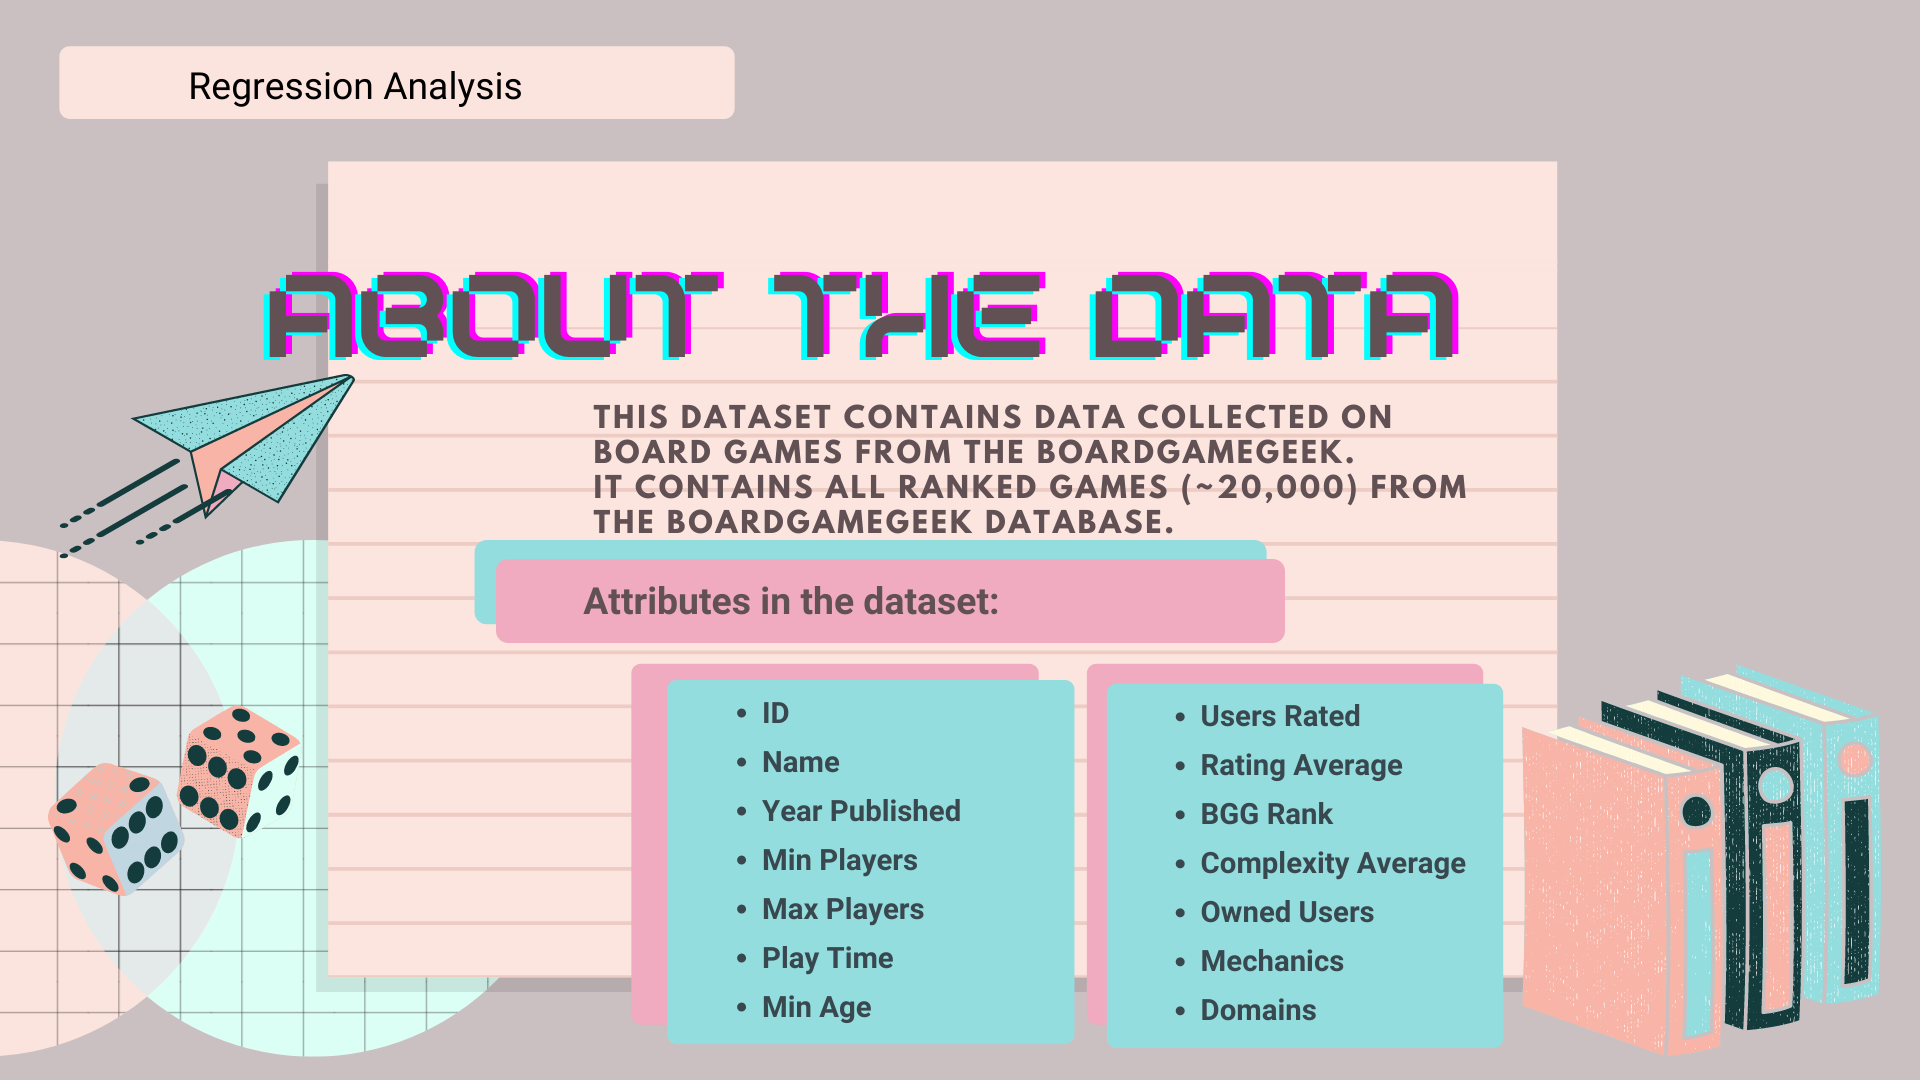

In [45]:
b=Image.open('D:/libraries/Board Games/BoardGamesaboout.png')
b


## Data Cleaning

**In this section, I will be performing:**
    
  - Data Cleaning
  - Feature Engineering



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  object 
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  object 
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 1.8+ MB


In [8]:
data.shape

(20343, 14)



**From the above info, it can be deduced that:**

   - Year published is not parsed as a DateTime object, but we can work with that.
   - The Rating Average and Complexity Average are saved as object data types. On further inspection, it can be concluded the decimal is misplaced as a comma.
   - There are some missing values
   - Mechanics and Domains are object data types and need further exploration


In [9]:
for i in data.columns:
    null_data = data[i].isna().sum()/len(data)*100
    if null_data>0:
            print("{} the null rate : {}%".format(i,round(null_data,2)))

ID the null rate : 0.08%
Year Published the null rate : 0.0%
Owned Users the null rate : 0.11%
Mechanics the null rate : 7.86%
Domains the null rate : 49.94%


**Let us handle the "Year Published" feature first of all**

In [10]:
# Date min and max year of publishing the game 
print('oldest games in the data is published in',min(data['Year Published']))
print('latest game in the data is pubished in', max(data['Year Published']))

oldest games in the data is published in -3500.0
latest game in the data is pubished in 2022.0


**The oldest game is quite old! I must see what game is it.**

In [11]:
data2=data[data['Year Published']==-3500.0]
data2

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
8174,2399.0,Senet,-3500.0,2,2,30,6,664,"5,82",8176,"1,48",1343.0,"Dice Rolling, Roll / Spin and Move",Abstract Games


**Oldest Game In The Dataset Is Senet:** *Senet is a board game from ancient Egypt. The earliest representation of senet is dated to 2620 BCE from the Mastaba of Hesy-Re, while similar boards and hieroglyphic signs are found even earlier.*

In [12]:
print('Oldest game in the dataset')
old=data.nsmallest(5,'Year Published').style.set_properties(**{"background-color": "#CABFC1","color": "#615154", "border-color": "#615154"})
old

Oldest game in the dataset


,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
8174,2399.000000,Senet,-3500.000000,2,2,30,6,664,"5,82",8176,"1,48",1343.000000,"Dice Rolling, Roll / Spin and Move",Abstract Games
1275,2397.000000,Backgammon,-3000.000000,2,2,30,8,11680,"6,54",1276,"2,02",17747.000000,"Advantage Token, Betting and Bluffing, Dice Rolling, Roll / Spin and Move, Track Movement",Abstract Games
20219,5546.000000,Marbles,-3000.000000,1,0,10,4,473,"4,69",20221,"1,10",399.000000,Flicking,Children's Games
8924,1602.000000,The Royal Game of Ur,-2600.000000,2,2,30,10,549,"5,90",8926,"1,31",1162.000000,"Dice Rolling, Roll / Spin and Move, Square Grid, Static Capture",Abstract Games
172,188.000000,Go,-2200.000000,2,2,180,8,14843,"7,64",173,"4,00",20398.000000,"Enclosure, Square Grid",Abstract Games




**In the next cell I will:**

   - Drop the NA values for **Owned Users**.
   - Create a new feature **Game** **Age** out of **Year Published**
   - Replace the comma in the **Rating Average** and **Complexity Average** with a decimal


In [13]:
# drop na values
data =data[data['Owned Users'].notna()]

#Getting the age of game from year published for simplicity 
data['Game age']=2022-data['Year Published']
data_age =pd.to_numeric(data['Game age'])

#A function to replace the comma with a decimal 
def fix_decimal(data):
    fixed_value =[]
    for i in data:
        i=i.replace(',','.')
        fixed_value.append(i)
    return fixed_value
    
# change the numeric data
data['Rating Average']  =pd.to_numeric(fix_decimal(data['Rating Average']))
data['Complexity Average'] =pd.to_numeric(fix_decimal(data['Complexity Average']))

*Next exploring columns that have missing values*

In [14]:
print('the columns have null values:',data.columns[data.isna().any()])

the columns have null values: Index(['Mechanics', 'Domains'], dtype='object')




As Mechanics and Domains hold text separated by a comma, for these features NA is a bit fishy so I will look at some of the NA rows.


In [15]:
# na values in mechanics

NAs = np.where(data['Mechanics'].isna())
print('Top 3 null values in Mechanics ')
data.iloc[NAs][:3].style.set_properties(**{"background-color": "#CABFC1","color": "#615154", "border-color": "#615154"})

Top 3 null values in Mechanics 


,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains,Game age
1059,85256.000000,Timeline: Inventions,2010.000000,2,8,15,8,7257,6.710000,1060,1.110000,12448.000000,nan,Family Games,12.000000
1150,113401.000000,Timeline: Events,2011.000000,2,8,15,8,4208,6.780000,1151,1.100000,7924.000000,nan,"Family Games, Party Games",11.000000
1216,131325.000000,Timeline: Diversity,2012.000000,2,8,15,8,3790,6.790000,1217,1.070000,7589.000000,nan,"Family Games, Party Games",10.000000


In [16]:
# na values in Domains

NAS = np.where(data['Domains'].isna())
print('Top 3 null values in Domains ')
data.iloc[NAS][:3].style.set_properties(**{"background-color": "#CABFC1","color": "#615154", "border-color": "#615154"})

Top 3 null values in Domains 


,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains,Game age
663,293141.000000,King of Tokyo: Dark Edition,2020.000000,2,6,30,8,1854,7.890000,664,1.630000,5157.000000,"Card Drafting, Dice Rolling, King of the Hill, Player Elimination, Push Your Luck",nan,2.000000
1011,177802.000000,Smash Up: It's Your Fault!,2016.000000,2,2,60,14,1663,7.530000,1012,2.060000,6347.000000,"Area Majority / Influence, Hand Management, Take That, Variable Phase Order",nan,6.000000
1047,226520.000000,Exit: The Game - The Sinister Mansion,2018.000000,1,4,90,12,1595,7.450000,1048,2.610000,3446.000000,Cooperative Game,nan,4.000000


I have decided to add new values for NA in the Mechanics and Domains

   - For Mechanics as "Not Mentioned"
   - for Domains as "Basic"


In [17]:

#Replacing NA values
data["Mechanics"] = data["Mechanics"].fillna("Not Mentioned")
data["Domains"] = data["Domains"].fillna("Basic")


Some observations to be noted concerning Mechanics and Domains:

   - It contains a list of strings of values
   - values are separated by either a "," or a "/"
   - There could be more rare characters

To eliminate these issues I will be cleaning the text and forming a tokenized value.

In [18]:
#Defining a function to clean up the text 
import re
def clean(Text):
    sms=re.sub('[^a-zA-Z], ,', ' ',str(Text))
    sms =sms.replace('/',', ')
    sms=sms.split(' ')
    sms = ' '.join(sms)
    return sms
data['Mechanics']=data['Mechanics'].apply(clean)
data['Domains']=data['Domains'].apply(clean)
print("First three values of Mechanics after cleaning text:")
print(data["Mechanics"][:3], "\n")

print("First three values of Domains after cleaning text:")
print(data["Domains"][:3])

First three values of Mechanics after cleaning text:
0    Action Queue, Action Retrieval, Campaign ,  Ba...
1    Action Points, Cooperative Game, Hand Manageme...
2    Hand Management, Income, Loans, Market, Networ...
Name: Mechanics, dtype: object 

First three values of Domains after cleaning text:
0    Strategy Games, Thematic Games
1    Strategy Games, Thematic Games
2                    Strategy Games
Name: Domains, dtype: object


In [19]:
#Dropping the redundant features
data = data.drop(["ID", "Name", "Year Published"], axis=1)

 <a id="1"></a>
# <p style="text-align:center;color=#CABFC1;font-size:150%;border-radius:40px 40px">Data Exploration</p>


In this section, 

Exploring data for outliers


* Exploring the Mechanics attribute
* Exploring the Domains attribute


**Let us start with pairplot**

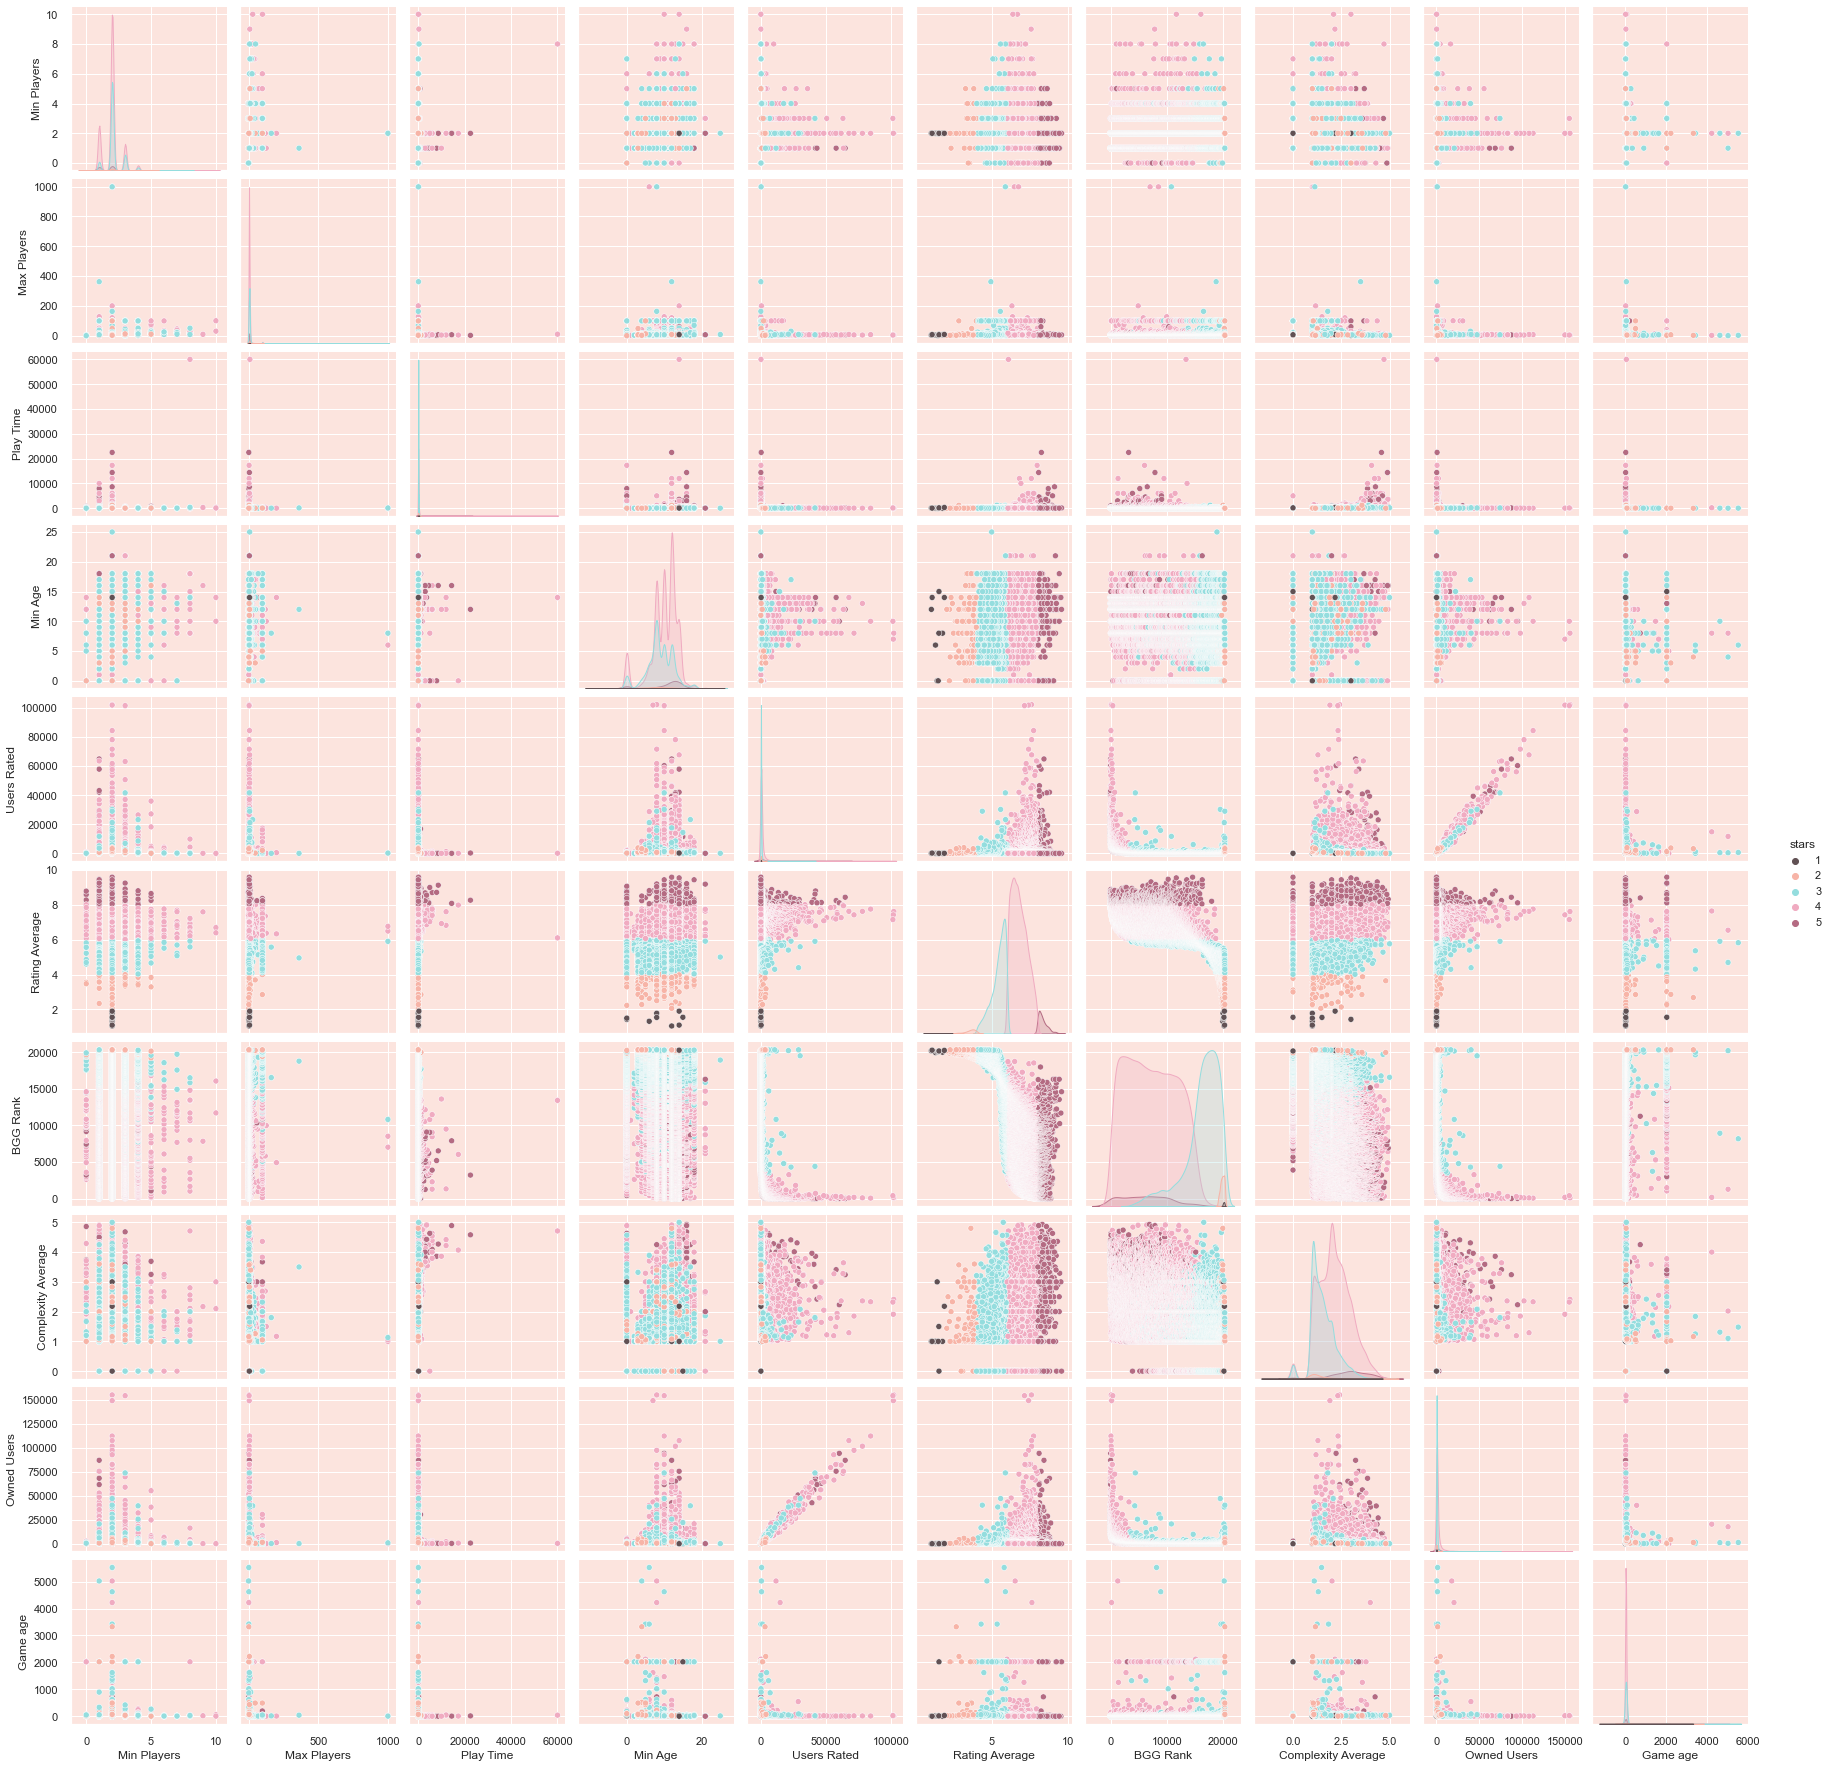

In [20]:
#Creating Five stars based bins
bins = [0, 2, 4, 6, 8, 10]
labels = [1,2,3,4,5]
hue_C = ["#615154", "#F7B4A7", "#94DDDE", "#F0ABC1", "#B46B82"]
sns.set(rc={"axes.facecolor":"#FCE4DE","figure.facecolor":"#CABFC1"})
data['stars']=pd.cut(data['Rating Average'],bins=bins,labels=labels)
cmap = colors.ListedColormap(["#615154", "#F7B4A7", "#94DDDE", "#DCFFF5", "#F0ABC1"])
palette = ["#615154", "#F7B4A7", "#94DDDE", "#FCE4DE", "#DCFFF5", "#F0ABC1", "#CABFC1"]
sns.pairplot(data,hue='stars',palette=hue_C)



There are some outliers. So I have examined those up close for anomaly detection. After some inspection, I have decided to be lenient with outliers so I will put a cap only to drop off some obvious anomalies

In [21]:

#Dropping the outliers. 
data = data[(data["Max Players"]<300)]
data = data[(data["Play Time"]<30000)]
data = data[(data["Min Age"]<22)]
data = data[(data["Users Rated"]<100000)]
data.shape

(20311, 13)

<Figure size 432x288 with 0 Axes>

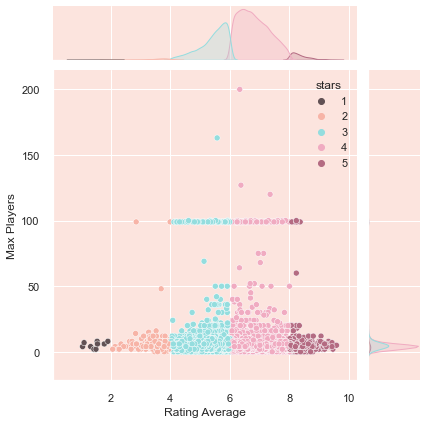

<Figure size 432x288 with 0 Axes>

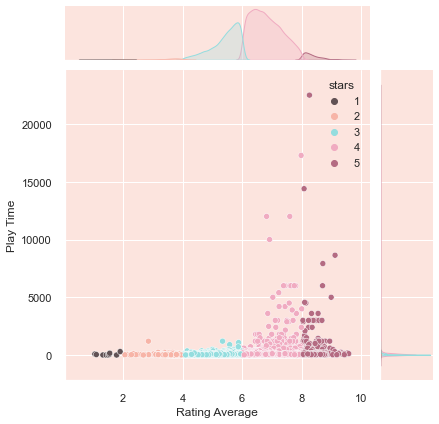

<Figure size 432x288 with 0 Axes>

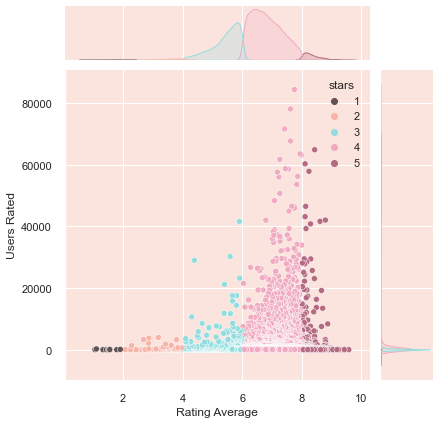

<Figure size 432x288 with 0 Axes>

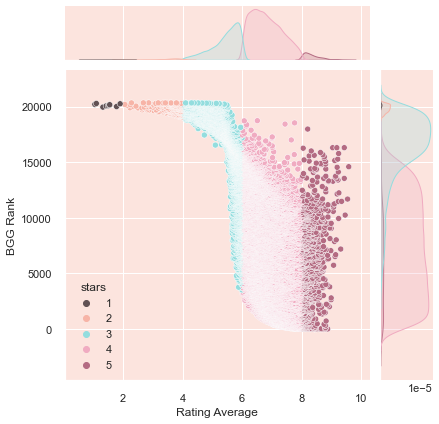

<Figure size 432x288 with 0 Axes>

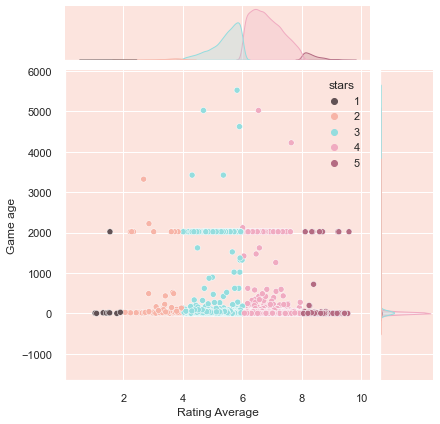

In [22]:
from matplotlib import colors
cmap = colors.ListedColormap(["#615154", "#F7B4A7", "#94DDDE", "#DCFFF5", "#F0ABC1"])
palette = ["#615154", "#F7B4A7", "#94DDDE", "#FCE4DE", "#DCFFF5", "#F0ABC1", "#CABFC1"]


cols =['Max Players','Play Time','Users Rated','BGG Rank','Game age']
for i in cols:
    plt.figure()
    sns.jointplot(x=data['Rating Average'],y=data[i],hue=data['stars'],palette=hue_C)
    plt.show()


   - The best-rated games (with 8+ ratings) need five or fewer min players.
   - Ratings have a correlation with Playtime as expected. People give a good rating of the game they like to play.
   - In general people care to vote if they like a game and don't bother voting if they don't like it.
   - BGG Rankings are in accordance with the Average ratings.


<AxesSubplot:>

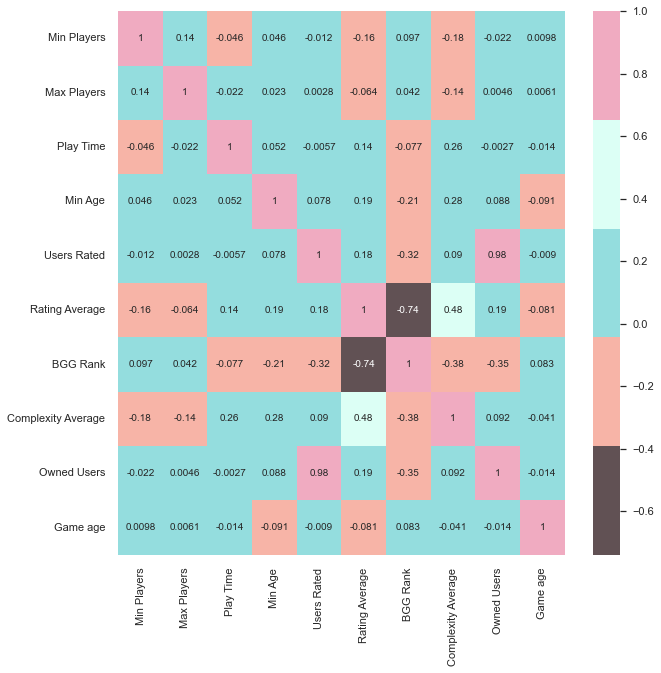

In [23]:
plt.figure(figsize=(10,10)) 
sns.heatmap(data.corr(),annot=True,cmap=cmap)

In [24]:
#get corpus
def Get_Corpus(bla):
    corpus=[]
    for i in bla:
        item =i.split(',')
        corpus+=item
    return corpus
# delete extra space
def space_eleminator(list):
    vals=[]
    for i in list:
        m=i.lstrip()
        vals.append(i)
    return vals
Mechanics_corpus = space_eleminator(Get_Corpus(data["Mechanics"]))
Domains_corpus = space_eleminator(Get_Corpus(data["Domains"]))
print("First 5 tokens in the Mechanics features:\n", Mechanics_corpus[:5])
print("First 5 tokens in the Domains features:\n", Domains_corpus[:5], "\n")

First 5 tokens in the Mechanics features:
 ['Action Queue', ' Action Retrieval', ' Campaign ', '  Battle Card Driven', ' Card Play Conflict Resolution']
First 5 tokens in the Domains features:
 ['Strategy Games', ' Thematic Games', 'Strategy Games', ' Thematic Games', 'Strategy Games'] 



**Exploring the Mechanics attribute**


In [25]:
from collections import Counter
#Creating a count dictionary for items in Mechanics 
mecha_col = Counter(Mechanics_corpus)
#Exploring the The occurence of Mechanincs 
item_m=list(mecha_col.keys())
val_m=list(mecha_col.values())

print("Number of unique items in Machanics:", len(mecha_col))
print("Most frequently used Mechanics appeared:", max(val_m), "times")
print("Least frequently used Mechanics appeared:", min(val_m), "time")

Number of unique items in Machanics: 331
Most frequently used Mechanics appeared: 3193 times
Least frequently used Mechanics appeared: 1 time


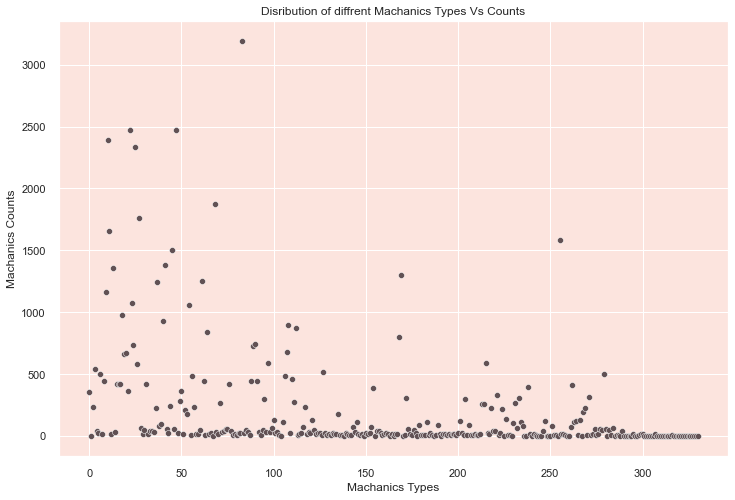

In [26]:
# scatter plot of mechanics columns
plt.figure(figsize=(12,8))
palette = ["#615154", "#F7B4A7", "#94DDDE", "#FCE4DE", "#DCFFF5", "#F0ABC1", "#CABFC1"]
sns.scatterplot(x=item_m,y=val_m,color=palette[0])
plt.title("Disribution of diffrent Machanics Types Vs Counts")
plt.xlabel("Machanics Types")
plt.ylabel("Machanics Counts")
plt.xscale("linear")
plt.show()

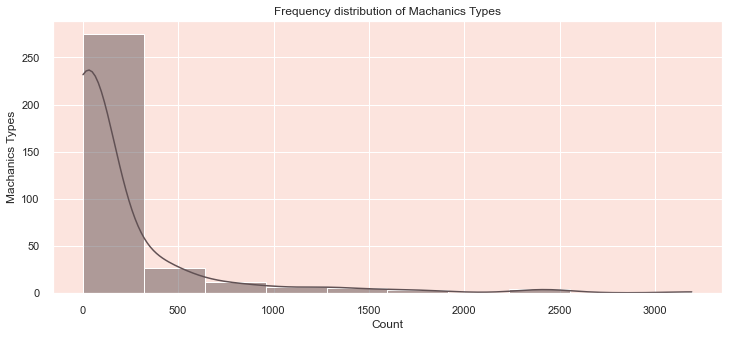

In [27]:
# Plotting the distribution of Mechanics types
plt.figure(figsize=(12,5))
sns.histplot(mecha_col,bins=10,kde=True,color=palette[0])
plt.title("Frequency distribution of Machanics Types")
plt.xlabel("Count")
plt.ylabel("Machanics Types")
plt.show()

In [28]:
print('five most frequently value of mechanics')
print(sorted(mecha_col,key=mecha_col.get,reverse=True)[:5])

five most frequently value of mechanics
['Dice Rolling', ' Dice Rolling', ' Variable Player Powers', ' Hand Management', ' Set Collection']


In [29]:
print('five most rare value of mechanics')
print(sorted(mecha_col,key=mecha_col.get,reverse=True)[-6:-1])

five most rare value of mechanics
['Loans', 'Force Commitment', 'Highest-Lowest Scoring', 'Relative Movement', 'Passed Action Token']


**Exploring the domain column**

In [30]:
domain_col =Counter(Domains_corpus)
#Exploring the The occurence of Domains
item_d =list(domain_col.keys())
val_d=list(domain_col.values())

print("Number of unique items in Machanics:", len(domain_col))
print("Most frequently used Mechanics appeared:", max(val_d), "times")
print("Least frequently used Mechanics appeared:", min(val_d), "time")

Number of unique items in Machanics: 16
Most frequently used Mechanics appeared: 10132 times
Least frequently used Mechanics appeared: 2 time


In [31]:
print("five frequents value of domain columns")
print(sorted(domain_col,key=domain_col.get,reverse=True)[:5])

five frequents value of domain columns
['Basic', 'Wargames', 'Family Games', 'Strategy Games', 'Abstract Games']


In [32]:
print('five rare value of domain column')
print(sorted(domain_col,key=domain_col.get,reverse=True)[-6:-1])

five rare value of domain column
['Customizable Games', ' Wargames', ' Family Games', ' Party Games', " Children's Games"]


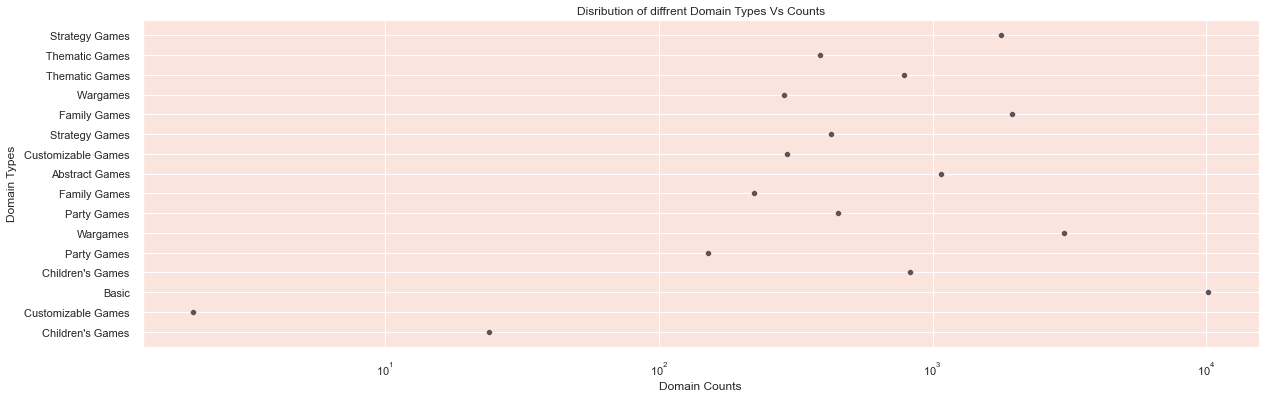

In [33]:
plt.figure(figsize=(20,6))
sns.scatterplot(y=item_d,x=val_d,color=hue_C[0])
plt.title("Disribution of diffrent Domain Types Vs Counts")
plt.ylabel("Domain Types")
plt.xlabel("Domain Counts")
plt.xscale("log")
plt.show()


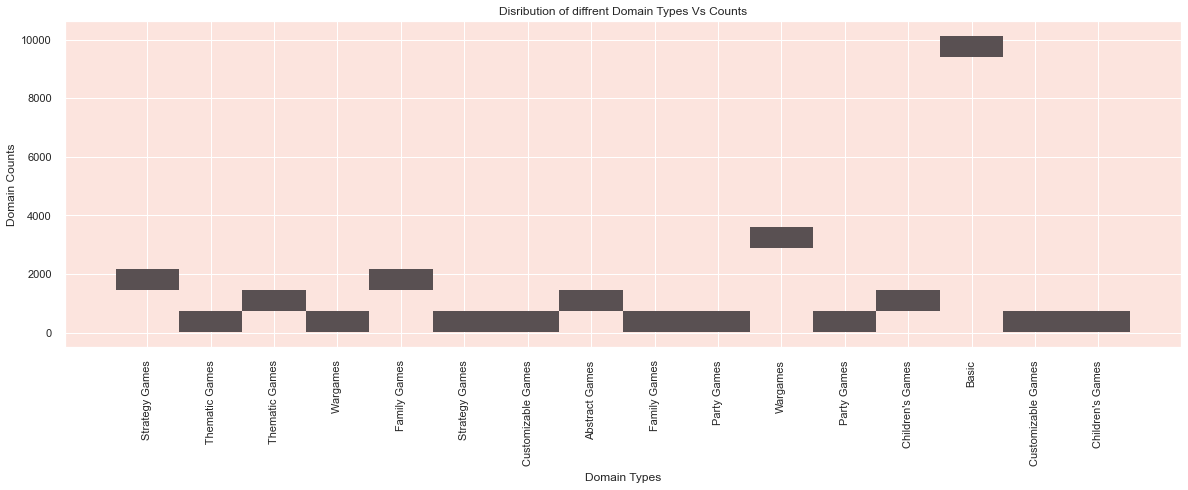

In [34]:
plt.figure(figsize=(20,6))
sns.histplot(x=item_d,y=val_d,color=hue_C[0])
plt.title("Disribution of diffrent Domain Types Vs Counts")
plt.xlabel("Domain Types")
plt.xticks(rotation=90)
plt.ylabel("Domain Counts")
plt.show()


<a id="2"></a>
# <p style="color:black;font-size:150%;text-align:center">Data Preprocessing</p>


At this step, I will be dealing with the object type variables Mechanics and Domains. I have decided to One Hot Encoded (OHE) these variables such that each of the individual attributes in the given cell gets its own column. 

**The following steps are involved:**
* Building dummies for the said columns 
* Dropping one of the columns created to avoid dummy variable trap
* Tiding up the column names because why not 
* Concatenating the OHE columns data frames with the main data frame
* Assigning labels and targets 
* Lastly, splitting the test and training sets

**Creating dummy variables**

In [35]:
# create dummy mechanics variables
machanics_df =data['Mechanics'].str.get_dummies(',')
machanics_df=machanics_df.drop(machanics_df.columns[-1],axis=1) # to avoid getting in trap

#create dummies for domains 
domains_df =data['Domains'].str.get_dummies(",")
domains_df=domains_df.drop(domains_df.columns[-1],axis=1)# to avoid getting in trap

#Clearing up the extra space in the column names (optional)
DFs = [machanics_df, domains_df]
for i in DFs:
    i.columns= [col.strip() for col in i.columns]

**Concatenate the dummy variables to the main dataframe**

In [36]:
data=data.drop(['Mechanics','Domains','stars'],axis=1)# stars is the rating 
data=pd.concat([data,machanics_df,domains_df],axis=1)
data.head(3)

,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Game age,...,Thematic Games,Wargames,Abstract Games,Basic,Children's Games,Customizable Games,Family Games,Party Games,Strategy Games,Thematic Games
0,1,4,120,14,42055,8.79,1,3.86,68323.0,5.0,...,1,0,0,0,0,0,0,0,1,0
1,2,4,60,13,41643,8.61,2,2.84,65294.0,7.0,...,1,0,0,0,0,0,0,0,1,0
2,2,4,120,14,19217,8.66,3,3.91,28785.0,4.0,...,0,0,0,0,0,0,0,0,1,0



**Assigning labels and targets** 

In [37]:
 # Assigning the featurs as x and trarget as y
y =data['Rating Average']
x= data.drop(["Rating Average"],axis =1)
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.5,random_state=7)

<a id="3"></a>
# <p style=";font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:40px 40px;">MODEL SELECTION</p>

For model selection, I will be building pipelines of five different regressors and select one with the best cross-validation results. 

**In this section:**

* The model pipelines with preprocessing: (Standard Scaler and PCA)
* Fitting the training set to the various models
* Getting the cross-validation results 
* Picking the best regressor

**Building the pipelines for and getting the various cross-validation scores**

In [38]:
from sklearn.pipeline import Pipeline
pipeline_lr=Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=50)),('linear',LinearRegression())])

In [39]:
# Dictionary of pipelines and model types for ease of reference
pipelines=[pipeline_lr]
# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression"}
for pipe in pipelines:
    pipe.fit(x_train,y_train)

In [40]:
#Getting CV scores  
from sklearn.model_selection import cross_val_score
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -0.722460 


<a id="4"></a>
# <p style=";font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:40px 40px;">Evaluating Models</p>

**Getting Predictions on the test set**

In [41]:
# Model prediction on test data
pred = pipeline_lr.predict(x_test)
# Model Evaluation
r2 = metrics.r2_score(y_test, pred)
Adjusted_r2 = 1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

# initialise data of lists.
ResultData = [[r2],[Adjusted_r2],[mae],[mse],[rmse]]
# Creates pandas DataFrame.
Results = pd.DataFrame(ResultData,columns= ["Scores"] ,index = ["R-Squared","Adjusted R-Squared", "Mean Absolute Error","Mean Square Error","Root Mean Square Error"])
Results.style.background_gradient(cmap=cmap)

,Scores
R-Squared,0.407907
Adjusted R-Squared,0.386519
Mean Absolute Error,0.546861
Mean Square Error,0.520612
Root Mean Square Error,0.721534


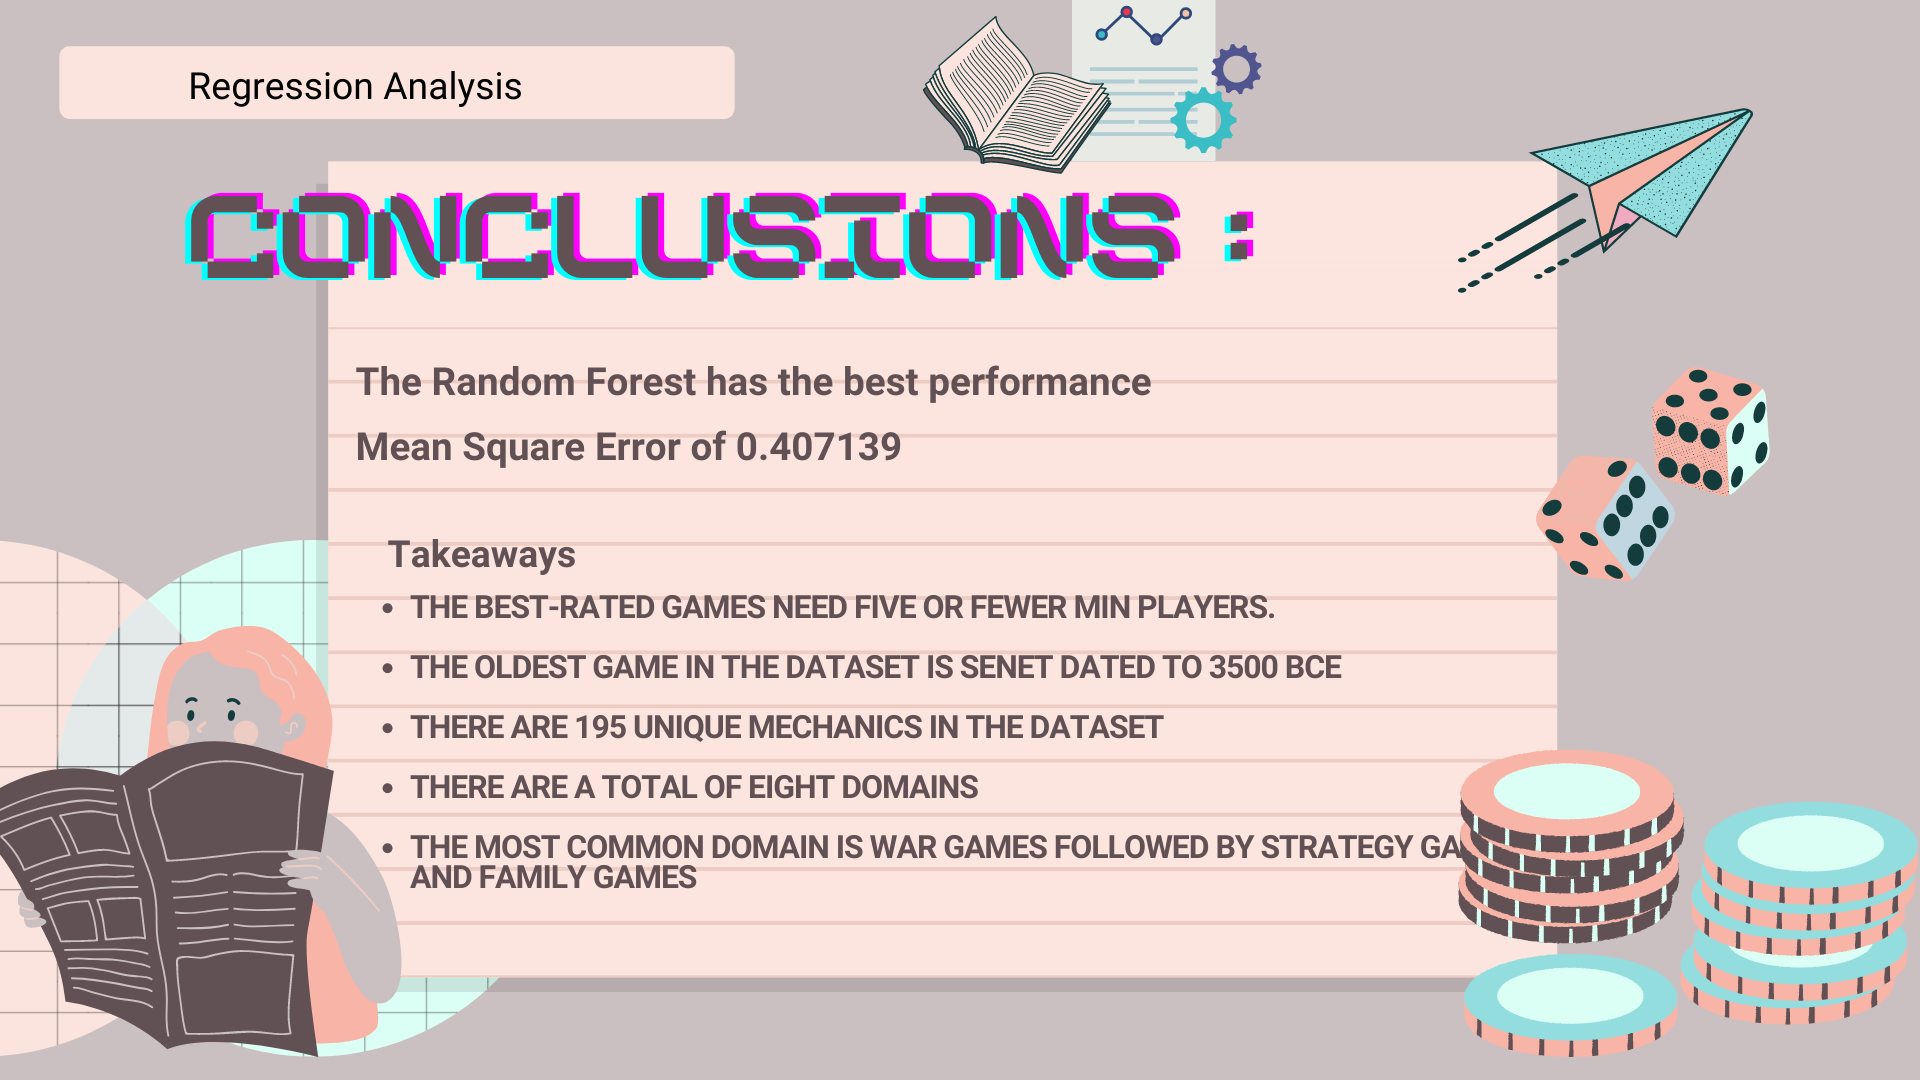

In [42]:
c=Image.open('D:/libraries/Board Games/BoardGamesend.png')
c